# Importing Packages

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf

In [ ]:
import math

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Using yfinance to download stock prices from jan 1 2016 to 1 oct to 2021

In [ ]:
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074741,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471445,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012114,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040895,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157442,283192000


# Visualizing Stock price history

Text(0, 0.5, 'Prices ($)')

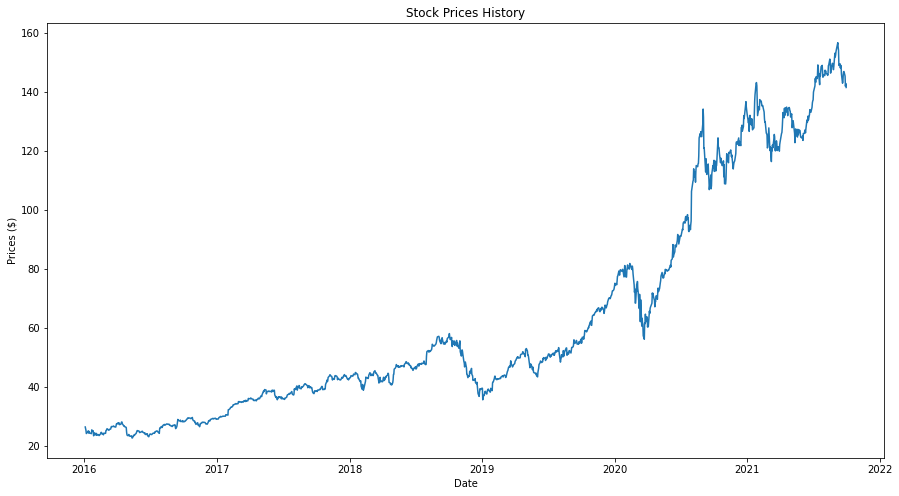

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

# Data PreProcessing

# We only need the close column so converting it into numpy array

In [ ]:
close_prices = stock_data['Close']
values = close_prices.values

# Now we split the datas into train and test data .
# We are using 80% of the data as train data and the rest as test data.

In [ ]:
training_data_len = math.ceil(len(values)* 0.8) # math.ceil rounds the number to its closest integer

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) # MinMaxScaler scales the datas to the given range
scaled_data = scaler.fit_transform(values.reshape(-1,1)) # scales the datas of values in the range of (0,1) and stores in scaled_data
train_data = scaled_data[0: training_data_len,:]


In [ ]:
train_data.shape

(1158, 1)

# Initializing the Training data

In [ ]:
x_train = []
y_train = []

# we are using 60 days windows for historical prices (x_train) i.e (i-60) and following 60 days as label data (y_train).

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # converting the training data to 3D array to train a LSTM model

# Preparing Test Data

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))# setting return_sequence to true so that the ouput of layer will be another sequence of same length
model.add(layers.LSTM(100, return_sequences=False)) # setting return_sequence to false so that this time only last output is returned in the output sequence
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


# Training LSTM model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=10)

Epoch 1/10
1098/1098 [==============================] - 18s 7ms/step - loss: 7.5053e-04
Epoch 2/10
1098/1098 [==============================] - 8s 7ms/step - loss: 3.7876e-04
Epoch 3/10
1098/1098 [==============================] - 8s 7ms/step - loss: 3.1773e-04
Epoch 4/10
1098/1098 [==============================] - 8s 8ms/step - loss: 1.7728e-04
Epoch 5/10
1098/1098 [==============================] - 8s 7ms/step - loss: 2.4376e-04
Epoch 6/10
1098/1098 [==============================] - 8s 7ms/step - loss: 1.7850e-04
Epoch 7/10
1098/1098 [==============================] - 8s 7ms/step - loss: 1.9085e-04
Epoch 8/10
1098/1098 [==============================] - 8s 8ms/step - loss: 1.9871e-04
Epoch 9/10
1098/1098 [==============================] - 8s 8ms/step - loss: 1.4380e-04
Epoch 10/10
1098/1098 [==============================] - 8s 8ms/step - loss: 1.7506e-04


# Model Evaluation

# inverse_transform denormalizes the predicted stock prices

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 1s 8ms/step


1.336357169497797

In [ ]:
residual = y_test - predictions

In [ ]:
print(residual)

[[ 1.57241821e-02 -3.33677673e+00  2.98225403e-01 ...  2.91982269e+01
   3.01182251e+01  2.87882233e+01]
 [-9.64553833e-01 -4.31705475e+00 -6.82052612e-01 ...  2.82179489e+01
   2.91379471e+01  2.78079453e+01]
 [ 1.92491150e+00 -1.42758942e+00  2.20741272e+00 ...  3.11074142e+01
   3.20274124e+01  3.06974106e+01]
 ...
 [-3.46244278e+01 -3.79769287e+01 -3.43419266e+01 ... -5.44192505e+00
  -4.52192688e+00 -5.85192871e+00]
 [-3.11756058e+01 -3.45281067e+01 -3.08931046e+01 ... -1.99310303e+00
  -1.07310486e+00 -2.40310669e+00]
 [-3.15528488e+01 -3.49053497e+01 -3.12703476e+01 ... -2.37034607e+00
  -1.45034790e+00 -2.78034973e+00]]


# Visualizing the Predicted Prices

<ipython-input-64-d92c50f720f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


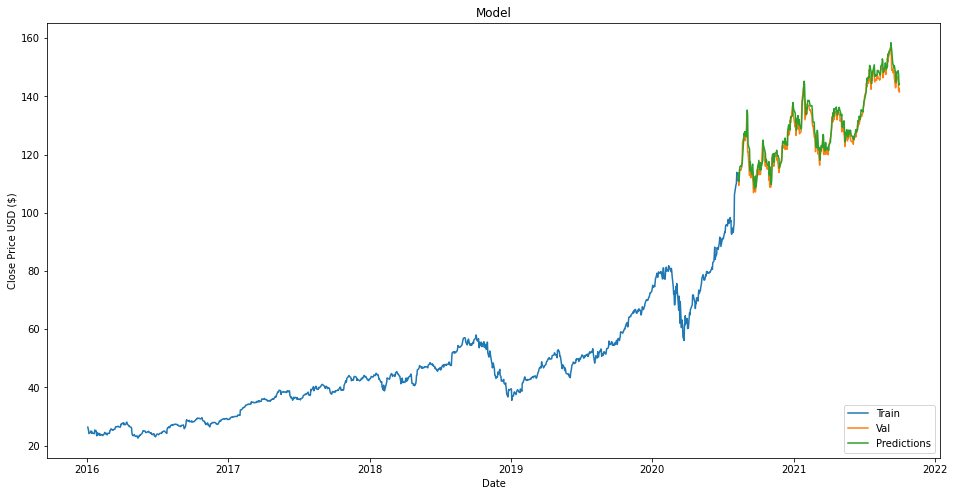

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [2]:
validation.head(10)

NameError: ignored